# Task 2 <br>
Stock Market Prediction And Forecasting Using Stacked LSTM

Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [4]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
data.shape

(2035, 8)

In [6]:
len(data['Date'].unique())

2035

In [7]:
data['Date']=data['Date'].astype('datetime64[ns]')

In [8]:
data['Date'][::5]

0      2018-09-28
5      2018-09-21
10     2018-09-12
15     2018-09-05
20     2018-08-29
          ...    
2010   2010-08-24
2015   2010-08-17
2020   2010-08-10
2025   2010-08-03
2030   2010-07-27
Name: Date, Length: 407, dtype: datetime64[ns]

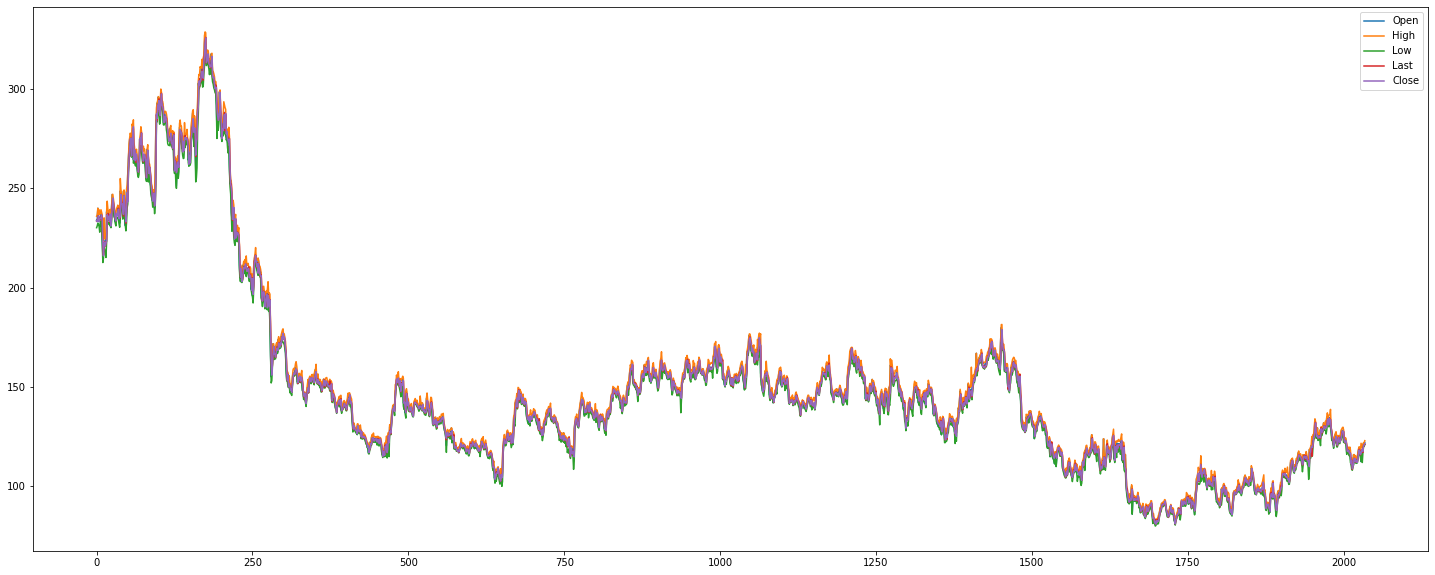

In [9]:
plt.figure(figsize=(25,10))
col = ['Open','High','Low','Last','Close']
plt.plot(data[['Open','High','Low','Last','Close']])
plt.legend(col)

In [10]:
stock_data = data.reset_index()['Close'] #setting closing rate as reference 

In [11]:
stock_data.max()

325.75

Text(0.5, 1.0, 'Closing Value - year')

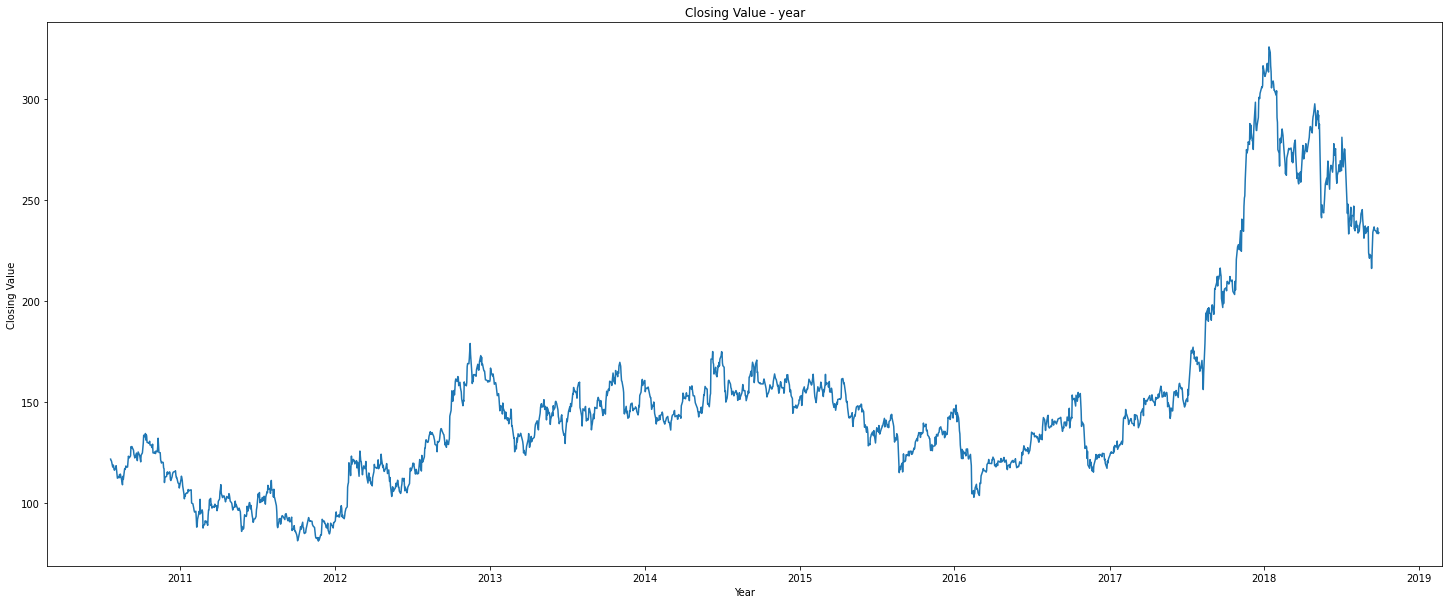

In [12]:
plt.figure(figsize=(25,10))
plt.plot(data['Date'],stock_data) #max value vs at line
plt.xlabel('Year')
plt.ylabel('Closing Value')
plt.title('Closing Value - year')

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_data=scaler.fit_transform(np.array(stock_data).reshape(-1,1))

In [14]:
stock_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Text(0.5, 1.0, 'Closing Value MinMax-Scaler - year')

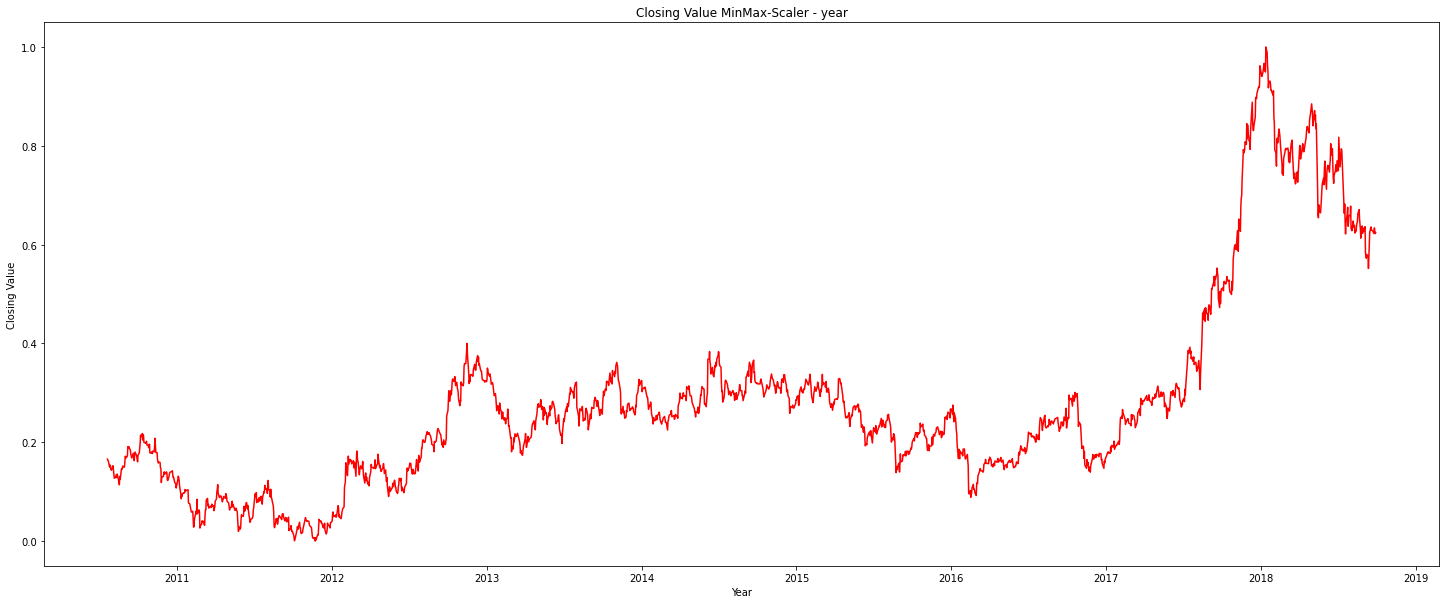

In [15]:
plt.figure(figsize=(25,10))
plt.plot(data['Date'],stock_data,color='red') #max value vs at line
plt.xlabel('Year')
plt.ylabel('Closing Value')
plt.title('Closing Value MinMax-Scaler - year')

## Splitting Dataset

In [16]:
training_size=int(len(stock_data)*0.75)
test_size=len(stock_data)-training_size

train_data,test_data=stock_data[0:training_size,:],stock_data[training_size:len(stock_data),:1]

In [17]:
training_size , test_size

(1526, 509)

In [18]:
train_data[:5]

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       [0.63378268],
       [0.62234477]])

In [19]:
test_data[:5]

array([[0.1621732 ],
       [0.15972222],
       [0.16278595],
       [0.17340686],
       [0.14174837]])

In [20]:
time_step = 150

In [21]:
X_Train, y_Train = [], []
for i in range((training_size)-time_step-1):
    a = stock_data[i:(i+time_step), 0]   
    X_Train.append(a)
    y_Train.append(stock_data[i + time_step, 0])
        
X_Train= np.array(X_Train) 
y_Train = np.array(y_Train)

In [22]:
X_Test, y_Test = [], []
for i in range((test_size)-time_step-1):
    a = stock_data[i:(i+time_step), 0]   
    X_Test.append(a)
    y_Test.append(stock_data[i + time_step, 0])
        
X_Test= np.array(X_Test) 
y_Test = np.array(y_Test)

In [23]:
print(X_Train.shape), print(y_Train.shape) ,print(X_Test.shape), print(y_Test.shape)

(1375, 150)
(1375,)
(358, 150)
(358,)


(None, None, None, None)

In [24]:
X_Train =X_Train.reshape(X_Train.shape[0],X_Train.shape[1] , 1)
X_Test = X_Test.reshape(X_Test.shape[0],X_Test.shape[1] , 1)

In [25]:
print(X_Train.shape), print(y_Train.shape) ,print(X_Test.shape), print(y_Test.shape)

(1375, 150, 1)
(1375,)
(358, 150, 1)
(358,)


(None, None, None, None)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM 

In [27]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(X_Train[0].shape)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer=Adam())


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           30200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 91,251
Trainable params: 91,251
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_Train, y_Train, epochs = 20 , validation_data = (X_Test, y_Test), shuffle = False , batch_size=128 )


Epoch 1/20
11/11 [==============================] - 17s 948ms/step - loss: 0.0566 - val_loss: 0.0229
Epoch 2/20
11/11 [==============================] - 8s 731ms/step - loss: 0.0075 - val_loss: 0.0078
Epoch 3/20
11/11 [==============================] - 8s 760ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 4/20
11/11 [==============================] - 8s 766ms/step - loss: 0.0017 - val_loss: 0.0070
Epoch 5/20
11/11 [==============================] - 8s 772ms/step - loss: 0.0047 - val_loss: 0.0073
Epoch 6/20
11/11 [==============================] - 8s 772ms/step - loss: 0.0057 - val_loss: 0.0090
Epoch 7/20
11/11 [==============================] - 8s 769ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 8/20
11/11 [==============================] - 8s 768ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 9/20
11/11 [==============================] - 8s 765ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 10/20
11/11 [==============================] - 8s 758ms/step - loss: 0.0014 - val_loss: 0.002

In [30]:
y_pred=model.predict(X_Test)

In [31]:
model.evaluate(X_Test,y_Test)

12/12 [==============================] - 1s 77ms/step - loss: 0.0043


0.004299632273614407

In [32]:
y_pred_inv = scaler.inverse_transform(y_pred)
y_pred_inv[:10]

array([[282.61435],
       [282.3961 ],
       [282.00528],
       [281.58936],
       [281.27716],
       [281.17297],
       [281.35587],
       [281.76245],
       [282.36172],
       [283.10123]], dtype=float32)

In [33]:
train_pred = model.predict(X_Train)
test_pred = model.predict(X_Test)

train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [34]:
MSE = math.sqrt(mean_squared_error(y_Test,y_pred))
MSE

0.06557158107746708

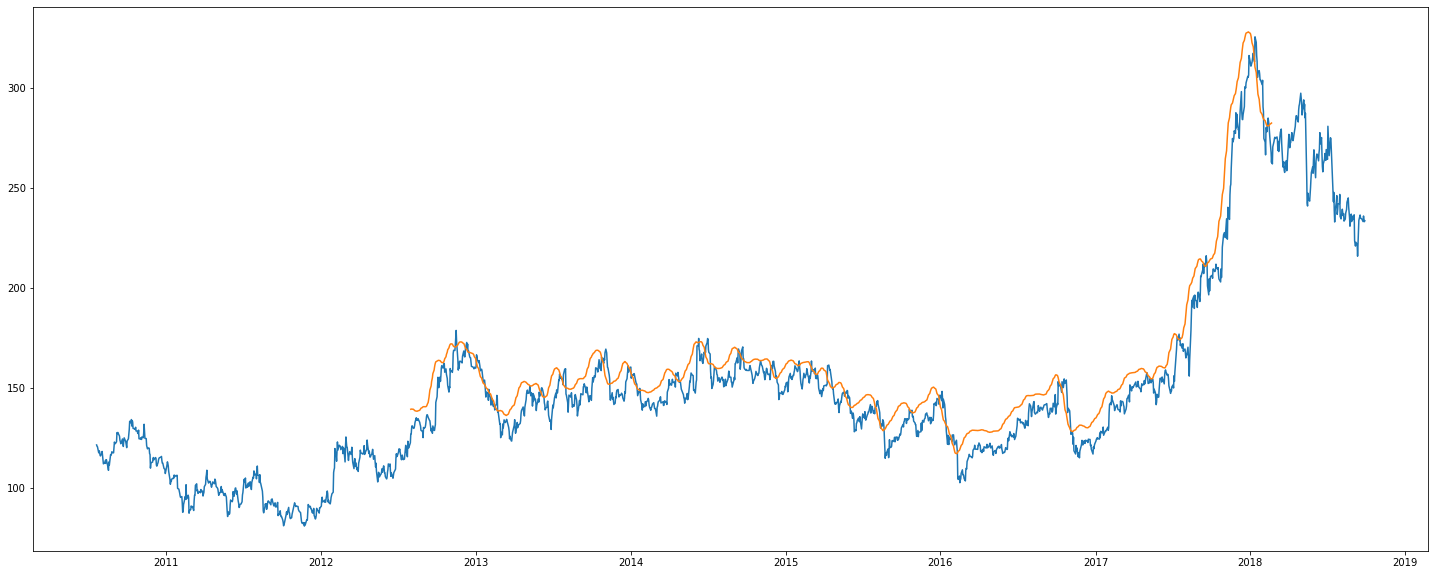

In [47]:
look_back=150
plt.figure(figsize=(25,10))

trainPredictPlot = np.empty_like(stock_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred

# shift test predictions for plotting

testPredictPlot = np.empty_like(stock_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred) + (look_back*2) + 1 : len(stock_data)-1:] = test_pred

# plot baseline and predictions

plt.plot(data['Date'] , scaler.inverse_transform(stock_data))
plt.plot(data['Date'] , trainPredictPlot)
plt.show()

In [37]:
testPredictPlot[len(train_pred) + (look_back*2) + 1 : len(stock_data)-1,:]

array([[282.61434937],
       [282.39608765],
       [282.00527954],
       [281.58935547],
       [281.27716064],
       [281.17297363],
       [281.35586548],
       [281.76245117],
       [282.36172485],
       [283.10122681],
       [283.77185059],
       [284.33621216],
       [284.78457642],
       [285.27404785],
       [285.9046936 ],
       [286.8757019 ],
       [288.22802734],
       [289.97253418],
       [292.0574646 ],
       [294.4317627 ],
       [297.02801514],
       [299.75094604],
       [302.47094727],
       [305.18197632],
       [307.87728882],
       [310.6048584 ],
       [313.39007568],
       [316.06716919],
       [318.54806519],
       [320.7822876 ],
       [322.76535034],
       [324.44073486],
       [325.78713989],
       [326.79724121],
       [327.48916626],
       [327.91772461],
       [328.17544556],
       [328.20983887],
       [328.01391602],
       [327.60964966],
       [326.99285889],
       [326.16052246],
       [325.150177  ],
       [324